# Motor de corrent continu d'excitació paral·lela

## Condicions nominals

Podem representar la versió més senzilla d'aquest motor amb el següent esquema:

![](img/MaqElec/motorDCep.png)

Aplicant les llei de Kirchoff:

$\Large U - \varepsilon = I_i \cdot r \Rightarrow I_i = \frac{U-\varepsilon}{r} $

$\Large U = I_p \cdot R_p \Rightarrow I_p = \frac{U}{R_p}$

$\Large I = I_i + I_p$

## Inversió de gir

Cal invertir la polaritat del rotor o de l'estator, però no tots dos a la vegada

## Comportament a l'engegada

Donada la similitud amb els motors anteriors, hem de posar un reostat $R_a$ amb sèrie amb el rotor per limitar la intensitat en l'engegada de forma que

$I_a = \alpha \cdot I_n$ 

$1,5 \le \alpha \le 2,5$

$\Large \Gamma_a =  \alpha \cdot \Gamma_n$

Es a dir, si dupliquem la intensitat a l'engegada també dupliquem el parell

## Corbes característiques

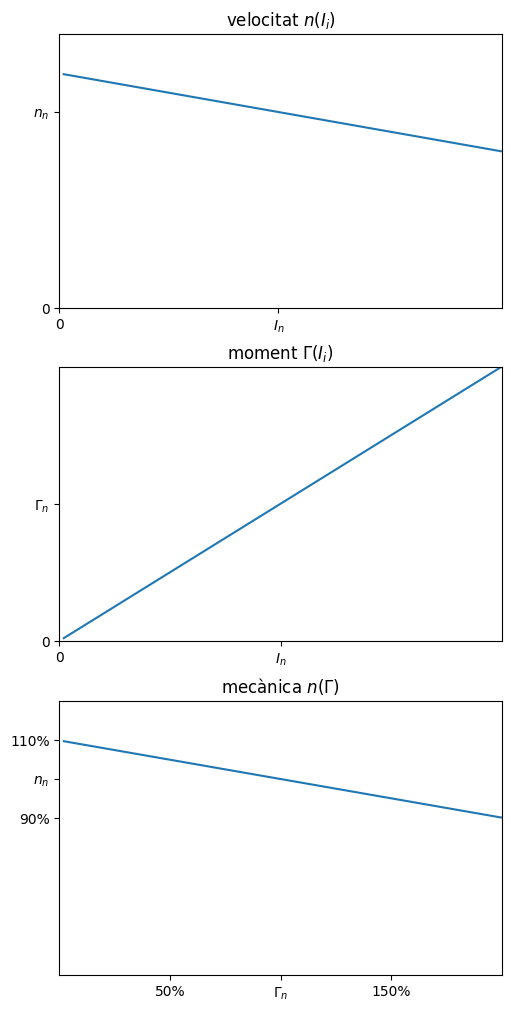

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
Pn=4E3
Un=280
In=17.1
Rexc=62
Iexc=Un/Rexc
nn=1200
En=Pn/In
r=(Un-En)/In
wn=nn*2*pi/60
kphi=En/wn
etan=Pn/(In*Un+Iexc*Un)
gn=kphi*In
x = np.linspace(0.02, 3, 300)
I = x*In
g = kphi*I 
e = Un-I*r
w = e/kphi
eta=e*I/(Un*I+Un*Iexc)

fig, axs = plt.subplots(3, 1, figsize=(5, 10), layout='constrained')

axs[0].plot(I/In, w/wn)
axs[0].axis([0, 2.02, 0, 1.4])
axs[0].set_xticks([0,1], ['0','$I_n$'])
axs[0].set_yticks([0,1], ['0','$n_n$'])
axs[0].set_title('velocitat $n(I_i)$')

axs[1].plot(I/In, g/gn)
axs[1].axis([0, 2, 0, 2])
axs[1].set_xticks([0,1], ['0','$I_n$'])
axs[1].set_yticks([0,1], ['0','$\Gamma_n$'])
axs[1].set_title('moment $\Gamma(I_i)$ ')

axs[2].plot(g/gn, w/wn)
axs[2].axis([0, 2, 0, 1.4])
axs[2].set_yticks([0.8,1,1.2], ['90%','$n_n$','110%'])
axs[2].set_xticks([0.5,1,1.5], ['50%','$\Gamma_n$','150%'])
axs[2].set_title('mecànica $n(\Gamma)$')

plt.show()

## Aplicacions

Com veiem aquest motor té un bon comportment: la variació de la càrrega només modifica lleugerament la velocitat, desenvolupant un parell proporcional al corrent. Com al cas de l'excitació independent, l'utilització dels elecroimants a l'estator permet fer motors potents i robusts.

Són motors ideals per màquines de velocitat pràcticament constant independentment de la càrrega: torns, trepants, ventiladors, bombes.

Especialment útils en màquines d'elevació on la càrrrega pot ser bruscament suprimida i un motor d'excitació sèrie podria embalar-se.

## Rendiment

Aquest motor té un rendiment nominal:

$$\Large \eta = \frac{P_u}{P_c} = \frac{\varepsilon \cdot I_i}{U \cdot I} = \frac{\varepsilon \cdot I_i}{U \cdot (I_i + I_p)}$$

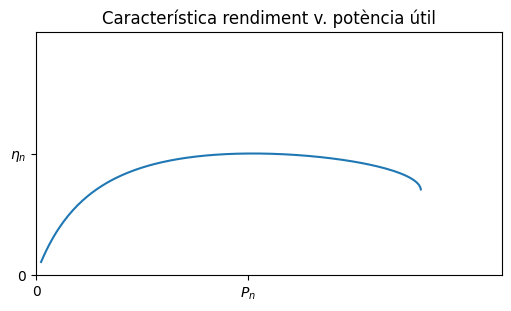

In [2]:
p=I*e

fig, ax = plt.subplots(1, 1, figsize=(5, 3), layout='constrained')

ax.plot(p/Pn, eta/etan)
ax.axis([0, 2.2, 0, 2])
ax.set_xticks([0,1], ['0','$P_n$'])
ax.set_yticks([0,1], ['0','$\eta_n$'])
ax.set_title('Característica rendiment v. potència útil')

plt.show()